Members
Kalema Moses
Nassali Fatumah
Mutabazi Victor Bwana

In this poject, we are faced with a dataset from a financial institution that seeks to leverage machine learning to determine whether a customer is eligible for a loan or not.
The dataset before us has a total of 13 features and 4269 data points. Since we are in possesion of a labelled dataset, we are to use supervised learning and since or outcome is binary in nature i.e approved or rejected we shall use Keras Binary regression to execute this project.
The next markdown contains the data dictionary for the dataset before us.

1	loan_id.....Unique identifier for each individual
2	no_of_dependent.....It tells whether the applicant has any dependents or not.
3	education.....It will tell us whether the applicant is Graduated or not.
4	self_employed....This defines that the applicant is self-employed i.e. Yes/ No
5	income_annum...This the amount of money an individual receives per year
6	loan_amount.......Loan amount (in thousands)
7	loan term.......Terms of loan (in months)
8	cibil_score......This states the applicant’s credit sore
9	residential_assets_value......The value of the applicant’s residential home
10	commercial_assets_value......The value of the applicant’s commercial assets
11	luxury_assets_value.......The value of the applicant’s luxury assets
12	bank_asset_value........The amount of money the applicant has on his/her bank account.
13	loan_status.........Status of Loan Approved or Rejected



In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score

#Keras
from tensorflow.keras import Sequential
from tensorflow.keras import metrics
from tensorflow.keras.layers import Dense, Dropout

#Sci-kit Learn
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
# Learning history plotting function
def plot_history(history):
  """Takes a keras model learning history and plots each metric"""

  metrics = history.history.keys()

  for metric in metrics:
      if not 'val' in metric:
        plt.plot(history.history[f'{metric}'], label=f'{metric}')
        if f'val_{metric}' in metrics:
          plt.plot(history.history[f'val_{metric}'], label=f'val_{metric}')
        plt.legend()
        plt.title(f'{metric}')
        plt.show()

In [4]:
#importing the data
df = pd.read_csv('/content/drive/MyDrive/loan_approval_dataset.csv')
df.head()


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [6]:
# checking for missing values and duplicates
df.shape
df.isnull().sum()
df.duplicated().sum()

0

In [7]:
#dropping loan_id
df.drop('loan_id',axis=1,inplace=True)
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


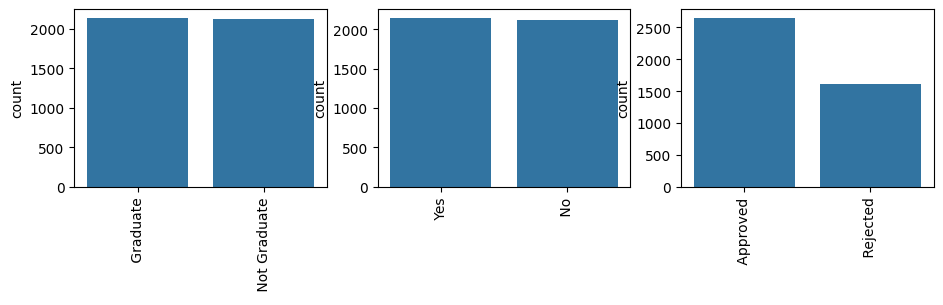

In [10]:
#creating bar graghs
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
plt.figure(figsize=(15,30))
index = 1

for col in object_cols:
  y = df[col].value_counts()
  plt.subplot(11,4,index)
  plt.xticks(rotation=90)
  sns.barplot(x=list(y.index), y=y) # Now 'sns' is recognized
  index +=1

In [11]:
#encoding categorical variables
encoder = OrdinalEncoder()
df[' education'] = encoder.fit_transform(df[[' education']])
df[' self_employed'] = encoder.fit_transform(df[[' self_employed']])
df[' loan_status'] = encoder.fit_transform(df[[' loan_status']])
df.head()




,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0.0,0.0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0.0
1,0,1.0,1.0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1.0
2,3,0.0,0.0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1.0
3,3,0.0,0.0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1.0
4,5,1.0,1.0,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1.0


In [12]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0.0,0.0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0.0
1,0,1.0,1.0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1.0
2,3,0.0,0.0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1.0
3,3,0.0,0.0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1.0
4,5,1.0,1.0,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1.0


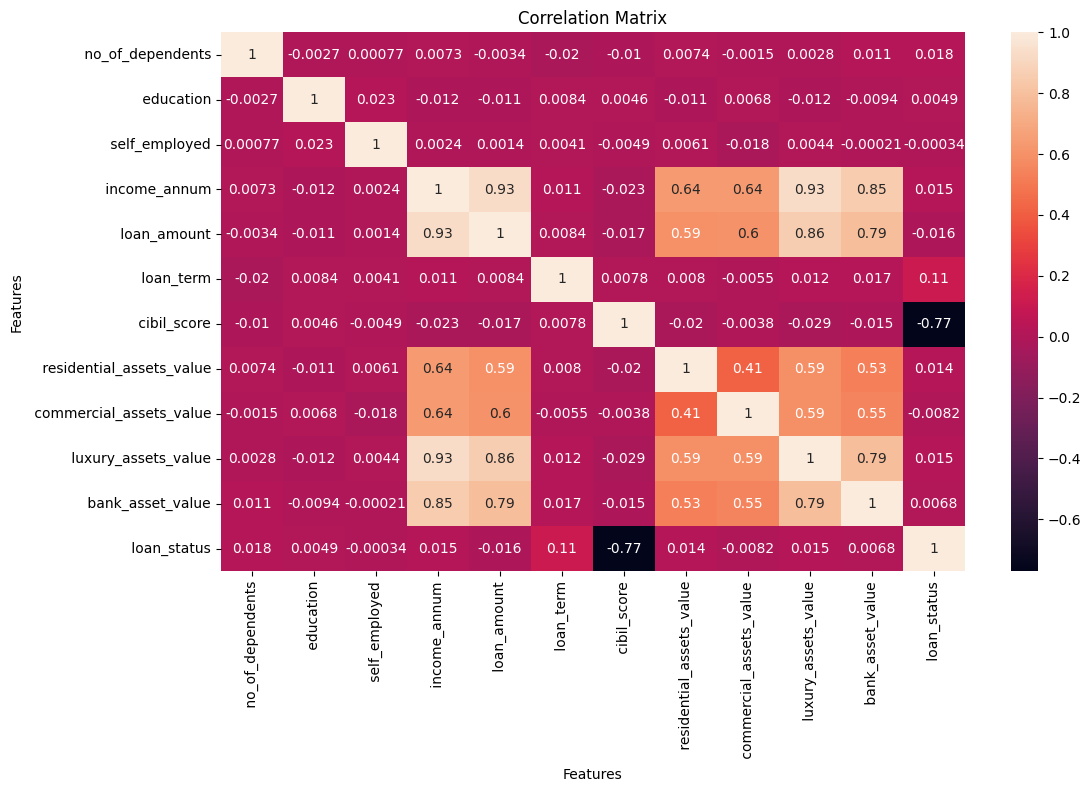

In [13]:
#correlation matrix
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True);
plt.xlabel('Features')
plt.ylabel('Features')
plt.title('Correlation Matrix');

From the above heatmap, we note thT cibil is negatively correlated to loan status , meaning as that as CIBIL_score increases, the chances of an individual getting a loan decrease

In [14]:
#Assigning features to X and targets to Y
X = df.drop(' loan_status',axis=1)
Y = df[' loan_status']

In [15]:
#Splitting the data into the training and test set
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

MODEL TRAINING AND EVALUATION

In [16]:
# transformers
scaler = StandardScaler()

X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [17]:
# create model architecture

input_dim = X_train_sc.shape[1]

# Instantiate sequential model object
clf_model = Sequential()


# Add layers
clf_model.add(Dense(10, input_dim=input_dim, activation='relu'))
clf_model.add(Dense(10, activation='relu'))
clf_model.add(Dense(1, activation='sigmoid'))


# View model structure
clf_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 241 (964.00 B)

 Trainable params: 241 (964.00 B)

 Non-trainable params: 0 (0.00 B)

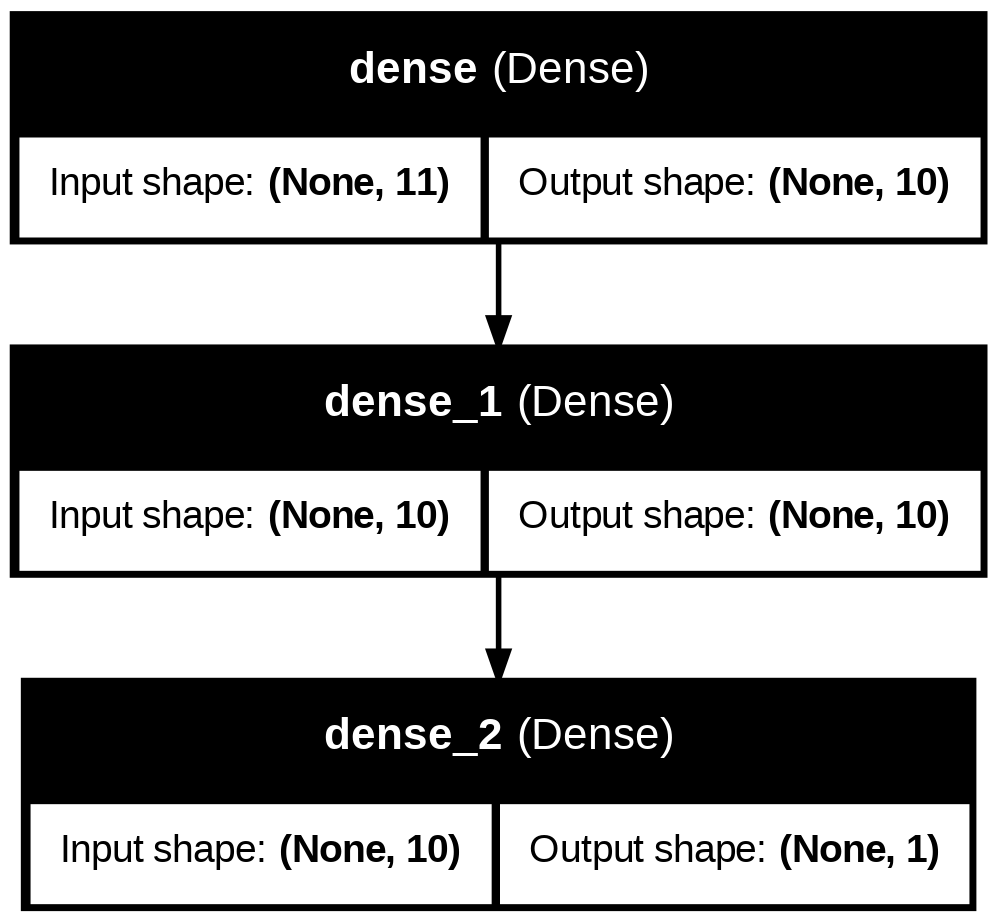

In [18]:
#visualization
from tensorflow.keras.utils import plot_model
plot_model(clf_model, to_file='clf_model.png', show_shapes=True, show_layer_names=True)

In [19]:
# compile model with metrics
clf_model.compile(loss='bce', optimizer='adam', metrics=['accuracy',
                                                         metrics.Precision(),
                                                         metrics.Recall()])



In [21]:
# Fitting the model
history = clf_model.fit(X_train_sc, Y_train, epochs=100, verbose=1)

Epoch 1/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6146 - loss: 0.6342 - precision: 0.5072 - recall: 0.0687
Epoch 2/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7224 - loss: 0.5084 - precision: 0.8585 - recall: 0.3258
Epoch 3/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8788 - loss: 0.3478 - precision: 0.8896 - recall: 0.7844
Epoch 4/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9187 - loss: 0.2552 - precision: 0.8901 - recall: 0.9000
Epoch 5/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9277 - loss: 0.2129 - precision: 0.8934 - recall: 0.9149
Epoch 6/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9310 - loss: 0.1953 - precision: 0.8988 - recall: 0.9210
Epoch 7/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9351 - loss: 0.1892 - precision: 0.9065 - recall: 0.9234
Epoch 8/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9373 - loss: 0.1853 - precision: 0.9095 - recall: 0.9293
Epoch 9/

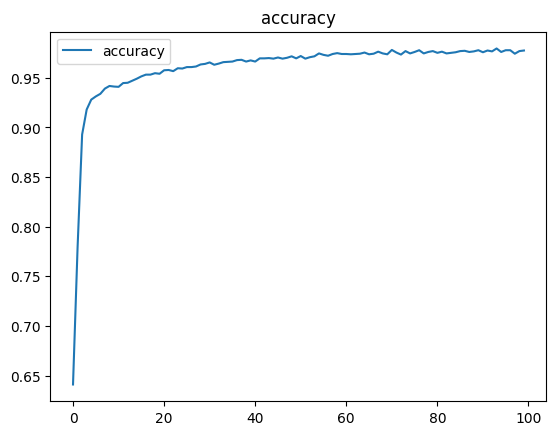

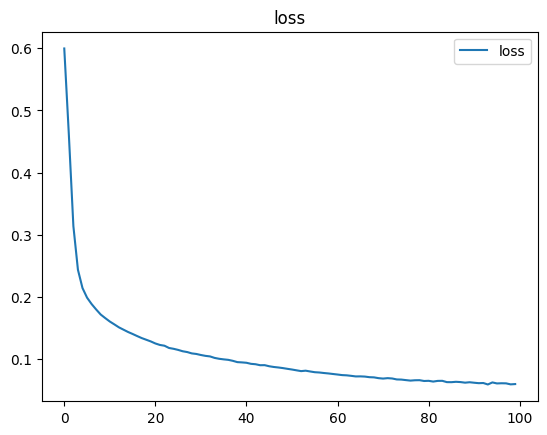

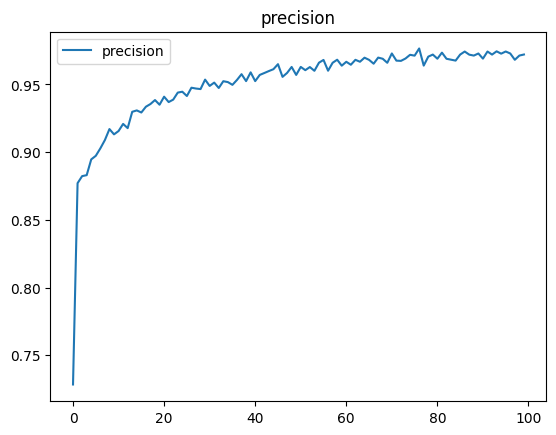

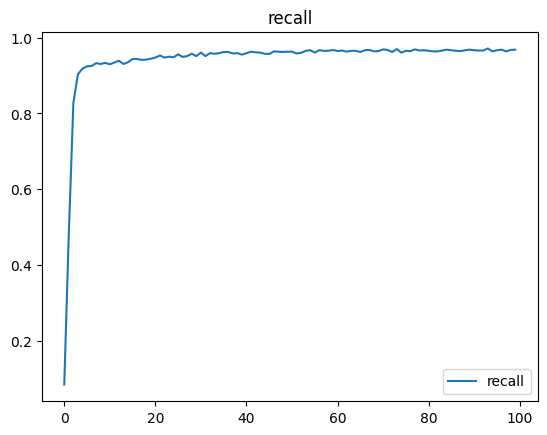

In [22]:
#visulisation of model's learning
plot_history(history)

In [23]:
#evaluation of the model
clf_model.evaluate(X_test_sc,Y_test)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9622 - loss: 0.0741 - precision: 0.9585 - recall: 0.9401  


[0.07426238059997559,
 0.9637002348899841,
 0.9735973477363586,
 0.9276729822158813]

with the above accuracy, precision and recall,we are better off building our model with keras compared to KNN and logistic regression.